In [3]:
from scipy.ndimage.morphology import binary_erosion, binary_dilation
from scipy.ndimage import generate_binary_structure
import numpy as np
from imageio import imread
import matplotlib.pyplot as plt

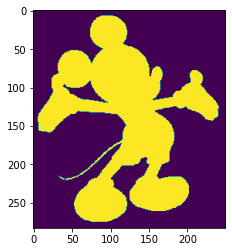

In [4]:
mickey = imread('mickey.bmp')

plt.imshow(mickey)

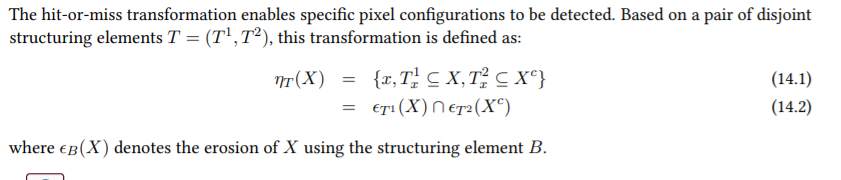

In [6]:
def hit_or_miss(image, T):
    
    # hit
    T1 = (T==1)
    
    # miss
    T2 = (T==-1)
    
    E1 = binary_erosion(image, T1)
    
    E2 = binary_erosion(np.logical_not(image), T2)
    
    return np.minimum(E1,E2)

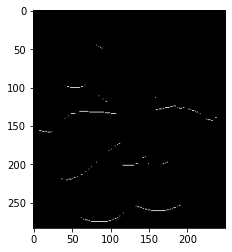

In [13]:
T = np.array([[1, 1, 1],
              [0, 1, 0],
              [-1, -1, -1]])

h_o_mickey = hit_or_miss(mickey,T)

plt.imshow(h_o_mickey, cmap='gray')

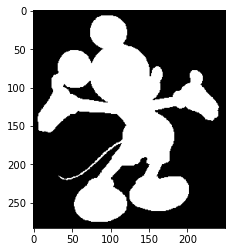

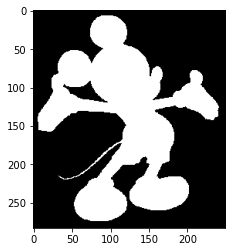

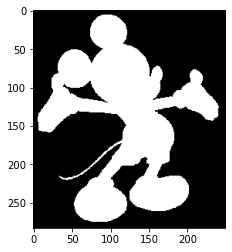

In [31]:
def thinning(X, T):
    return np.logical_xor(X, hit_or_miss(X, T))
    
def thickening(X, T):
    return np.logical_or(X, hit_or_miss(np.logical_not(X), T))


thin_mickey = thinning(mickey, T)
thick_mickey = thickening(mickey, T)


to_show = [mickey, thin_mickey, thick_mickey]


'''
plt.subplot(1,3,1)
plt.imshow(mickey)

plt.subplot(1,3,2)
plt.imshow(thin_mickey)

plt.subplot(1,3,3)
plt.imshow(thick_mickey)
'''

for im in to_show:
    plt.figure()
    plt.imshow(im, cmap='gray')

In [32]:
TT = []
TT.append(np.array([[-1, -1, -1], [0, 1, 0], [1, 1, 1]]))
TT.append(np.array([[0, -1, -1], [1, 1, -1], [0, 1, 0]]))
TT.append(np.array([[1, 0, -1], [1, 1, -1], [1, 0, -1]]))
TT.append(np.array([[0, 1, 0], [1, 1, -1], [0, -1, -1]]))
TT.append(np.array([[1, 1, 1], [0, 1, 0], [-1, -1, -1]]))
TT.append(np.array([[0, 1, 0], [-1, 1, 1], [-1, -1, 0]]))
TT.append(np.array([[-1, 0, 1], [-1, 1, 1], [-1, 0, 1]]))
TT.append(np.array([[-1, -1, 0], [-1, 1, 1], [0, 1, 0]]))

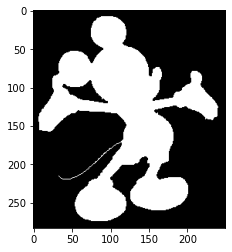

In [60]:
def morph_thinning(image, Ts):
    for el in Ts:
        image = thinning(image, el)
    return image

plt.imshow( morph_thinning(mickey,TT), cmap='gray' )

In [79]:
import sklearn
sklearn.__version__

'0.24.1'

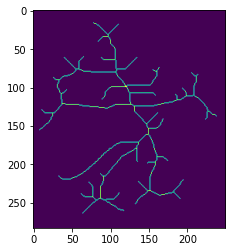

In [72]:
def top_skeleton(image, TT):
    last = np.array([])
    cnt = 0
    while not(np.array_equal(image,last)):
        last = image
        image = morph_thinning(image,TT)
    return image
        
plt.imshow(top_skeleton(mickey, TT))

In [ ]:
def morph_skeleton(image):
    se = generate_binary_structure(2,1) # disk
    X = np.copy(image)